In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Kaustav\Desktop\MY CODE\HOME Practice\ANACONDA\AI ML DL RL\003 KGP Talkie\02 Machine Learning\temp\data.csv',index_col=0)
data.head()

,x,y,cluster
0,-1.979383,9.265949,0.0
1,20.356635,-4.389007,1.0
2,-12.158185,-25.334850,0.0
3,1.706165,5.214209,1.0
4,-0.190310,-0.998589,2.0


In [3]:
data['cluster'].value_counts()

1.0    52
0.0    45
2.0    43
Name: cluster, dtype: int64

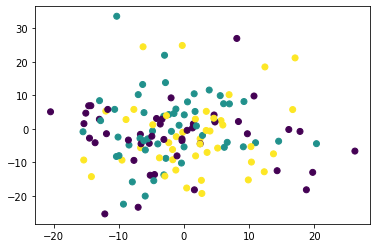

In [4]:
plt.scatter(data['x'] , data['y'], c = data['cluster'] , cmap='viridis')

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
X = data[['x','y']]
y = data['cluster']

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
data[['x','y']] = X

In [9]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [10]:
kmeans.labels_

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0,
       1, 2, 2, 2, 0, 0, 1, 1])

In [11]:
kmeans.cluster_centers_

array([[-0.52819641, -0.73228223],
       [ 1.06538682,  0.05729035],
       [-0.59515688,  0.96824482]])

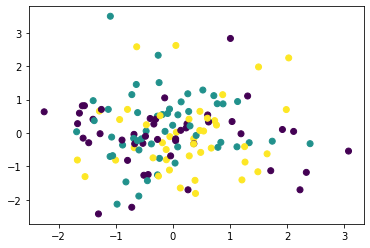

In [12]:
# Orginal Data
plt.scatter(data['x'] , data['y'], c = data['cluster'] , cmap='viridis')

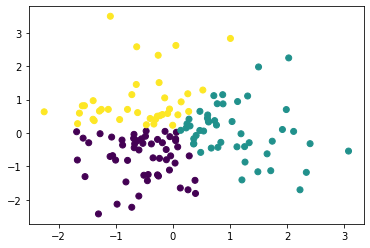

In [13]:
# prediction by KMeans
plt.scatter(data['x'] , data['y'], c = kmeans.labels_ , cmap='viridis')

In [14]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i , random_state = 42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 280.0
2 186.34004870504606
3 132.2527783889047
4 100.7509780689675
5 74.89608271244049
6 62.199001599765445
7 52.30003135613848
8 45.74851951952054
9 39.51116278644754


[]

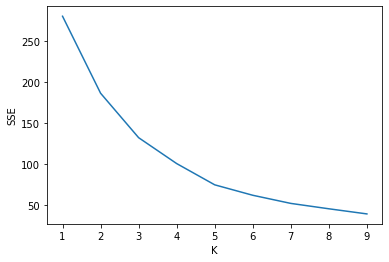

In [15]:
plt.plot(index,SSE)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot()

# Testing with Iris DataSet

In [16]:
from sklearn import datasets

In [19]:
iris = datasets.load_iris()
X = iris.data
# print(iris.DESCR)

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i , random_state = 42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 600.0
2 222.36170496502308
3 139.82049635974982
4 114.41256181896094
5 90.92751382392052
6 80.02249599557439
7 71.8162459810614
8 62.28749580350201
9 54.81105203150129


[]

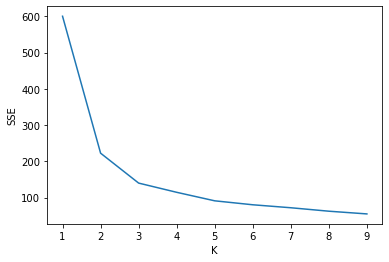

In [23]:
plt.plot(index,SSE)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot()
# Around 2/3 Clusters